In [1]:
#decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Attempt to load data
try:
    # Ensure the path to your Excel file is correct
    data = pd.read_excel("/content/completed_orders_with_scores.xlsx")
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the data:", e)
    exit()

# Verify and update feature and target names
features = ['source points ', 'status points ', 'gro region point ', 'source detail points ', 'drop geo region points', 'platform point ']  # Adjusted names with spaces
target = 'STATUS_orders'  # Updated to a likely target variable, adjust as necessary

# Check if all features and target are in the DataFrame
missing_columns = [col for col in features + [target] if col not in data.columns]
if missing_columns:
    print("The following columns are missing from the dataset:", missing_columns)
    exit()

# Preprocess data: fill missing values for numeric columns only
numeric_data = data.select_dtypes(include=np.number)
mean_values = numeric_data.mean()
data.fillna(mean_values, inplace=True)

# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)


Data loaded successfully.
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

   completed       1.00      1.00      1.00      1927

    accuracy                           1.00      1927
   macro avg       1.00      1.00      1.00      1927
weighted avg       1.00      1.00      1.00      1927

Confusion Matrix:
 [[1927]]


Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

   completed       1.00      1.00      1.00      1927

    accuracy                           1.00      1927
   macro avg       1.00      1.00      1.00      1927
weighted avg       1.00      1.00      1.00      1927

Random Forest Confusion Matrix:
 [[1927]]


[Text(0.5, 0.5, 'gini = 0.0\nsamples = 4871\nvalue = 7708.0')]

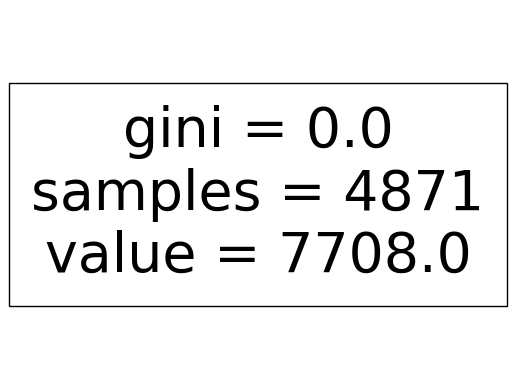

In [2]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the classifier
rf_classifier.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
from sklearn.tree import plot_tree

# Visualize one of the trees in the forest
tree_in_forest = rf_classifier.estimators_[0]  # Visualizing the first tree
plot_tree(tree_in_forest, filled=True)


In [3]:
#Support Vector Machine (SVM) Classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' and 'y' are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the SVM Classifier
svm_classifier = svm.SVC(kernel='linear')  # Change kernel as needed

# Train the classifier
svm_classifier.fit(X_train, y_train)
# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("SVM Accuracy:", accuracy)
print("SVM Classification Report:\n", classification_report)
print("SVM Confusion Matrix:\n", conf_matrix)


ValueError: The number of classes has to be greater than one; got 1 class

In [6]:
#K-Nearest Neighbors (KNN) Classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_excel('/content/completed_orders_with_scores.xlsx')  # Adjust the path to your file

# Define numeric and categorical features
numeric_features = ['source points ', 'status points ', 'gro region point ', 'source detail points ',
                    'drop geo region points', 'platform point ']  # Adjust if there are changes
categorical_features = []  # Add any categorical feature names

# Handle missing values
numeric_columns = data[numeric_features].select_dtypes(include=['number'])
means = numeric_columns.mean()
data[numeric_features] = numeric_columns.fillna(means)

if categorical_features:
    categorical_columns = data[categorical_features]
    modes = categorical_columns.mode().iloc[0]
    data[categorical_features] = categorical_columns.fillna(modes)

# Assume 'target' is your target variable
target = 'score'

# Split data into features (X) and target (y)
X = data[numeric_features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print results
print("KNN Accuracy:", accuracy)
print("KNN Classification Report:\n", classification_report)
print("KNN Confusion Matrix:\n", conf_matrix)



KNN Accuracy: 0.6133886870783601
KNN Classification Report:
               precision    recall  f1-score   support

          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         7
          13       1.00      0.60      0.75         5
          14       0.74      0.84      0.78        37
          15       0.33      0.21      0.26        14
          16       0.64      0.89      0.74        18
          17       0.52      0.79      0.63        28
          18       0.57      0.25      0.35        16
          19       0.50      0.25      0.33         4
          20       0.50      0.33      0.40         3
          21       0.60      0.60      0.60         5
          22       0.75      0.50      0.60         6
          23       0.40      0.67      0.50         6
          24       0.78      0.58      0.67        12
          25       0.60      1.00      0.75        15
          26       0.71      0.71      0.71         7
          27       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
